In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import sys
import numpy as np
sys.path.append('/home/tammy.kojima/Authorship-attribution/')
import selection_ml as sml

In [2]:
df = pd.read_csv("/home/tammy.kojima/Authorship-attribution/df_pronto/df_mistral_com_features.csv")
feature_columns = [col for col in df.columns if col not in ['text', 'origin']]

📊 Calculando Mutual Information...
🔍 Removendo features redundantes...
   🗑️  Removendo 'ai' (coluna especificada)
   🗑️  Removendo 'intelligence' (coluna especificada)
   🗑️  Removendo 'artificial intelligence' (coluna especificada)
   🗑️  Removendo 'artificial' (coluna especificada)
   🗑️  Removendo 'education' (coluna especificada)
   🗑️  Removendo 'students' (coluna especificada)
   🔄 Removendo 'lexical_unique_words' (correlacionada com 'syntactic_pos_bigram_entropy': 0.866)
   🔄 Removendo 'lexical_word_count' (correlacionada com 'syntactic_pos_bigram_entropy': 0.832)
   🔄 Removendo 'syntactic_pos_tag_entropy' (correlacionada com 'syntactic_pos_bigram_entropy': 0.884)
   🔄 Removendo 'https co' (correlacionada com 'co': 0.865)
   🔄 Removendo 'https' (correlacionada com 'co': 0.809)
   🔄 Removendo 'the future' (correlacionada com 'future': 0.885)
   🔄 Removendo 'intelligence is' (correlacionada com 'artificial intelligence is': 0.999)
   🔄 Removendo 'the future of' (correlacionada co

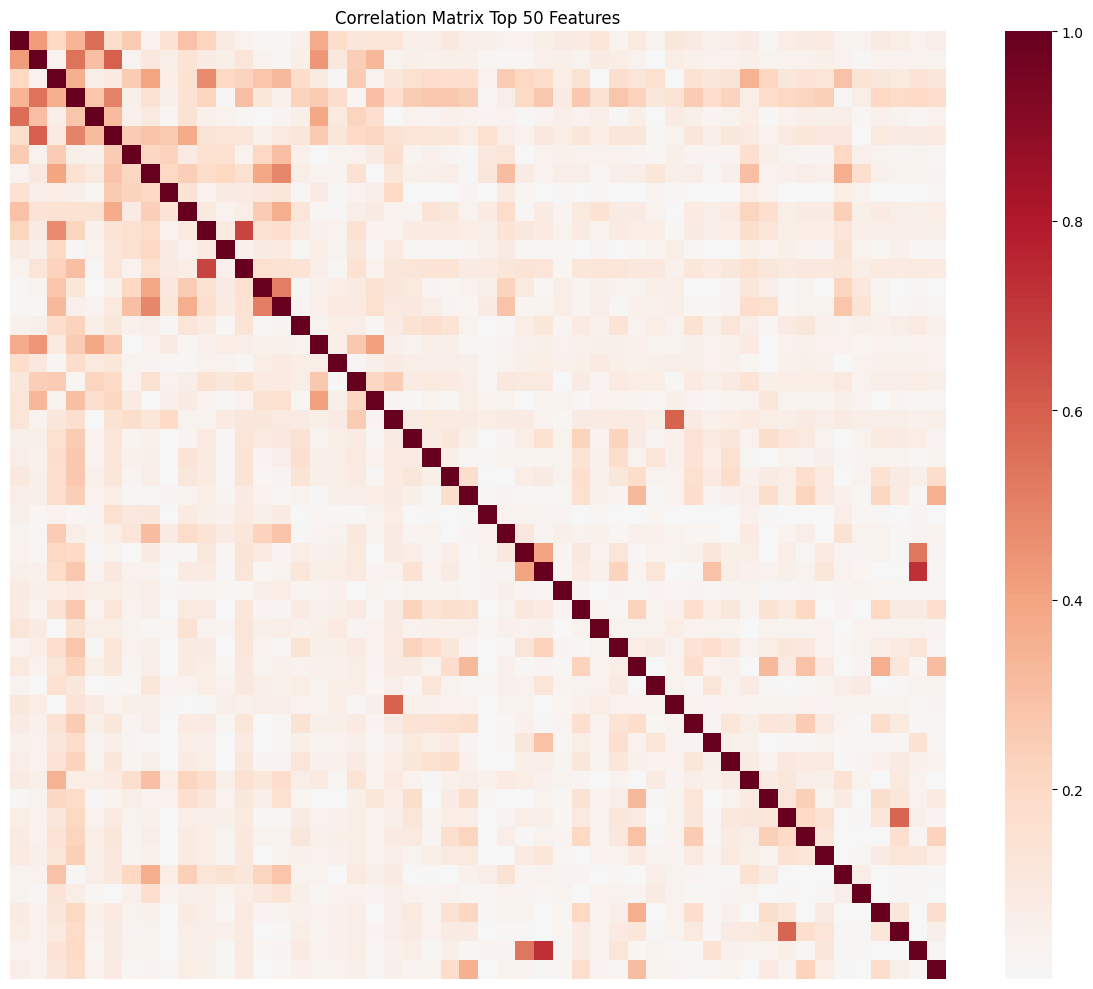

🎯 Selecionando melhor conjunto de features...

📋 RELATÓRIO FINAL DA SELEÇÃO DE FEATURES
Total de features inicial: 328
Features após MI: 328
Features após remoção de redundâncias: 287


In [3]:
# Executar a validação completa
mi_df_final = sml.validate_feature_selection(
    df=df,
    feature_names=feature_columns,
    target='origin',
    top_n_range=range(10, 101, 10),  # Testa de 10 a 100 features em steps de 10
    cv_folds=5,
    correlation_threshold=0.8
)

In [ ]:
mi_df_final.to_csv("/home/tammy.kojima/Authorship-attribution/df_pronto/top_features_mistral.csv", index=False)

,feature,mi_score
0,lexical_avg_word_length,0.312676
1,structural_hashtag_density,0.283646
2,syntactic_pos_bigram_entropy,0.276014
3,structural_has_hashtag,0.274181
7,lexical_word_length_variance,0.221340
...,...,...
323,best,0.000000
324,there,0.000000
325,to be,0.000000
326,tomorrow,0.000000


In [3]:
top_features = pd.read_csv("/home/tammy.kojima/Authorship-attribution/df_pronto/top_features_mistral.csv")
top20_features = top_features.head(20)

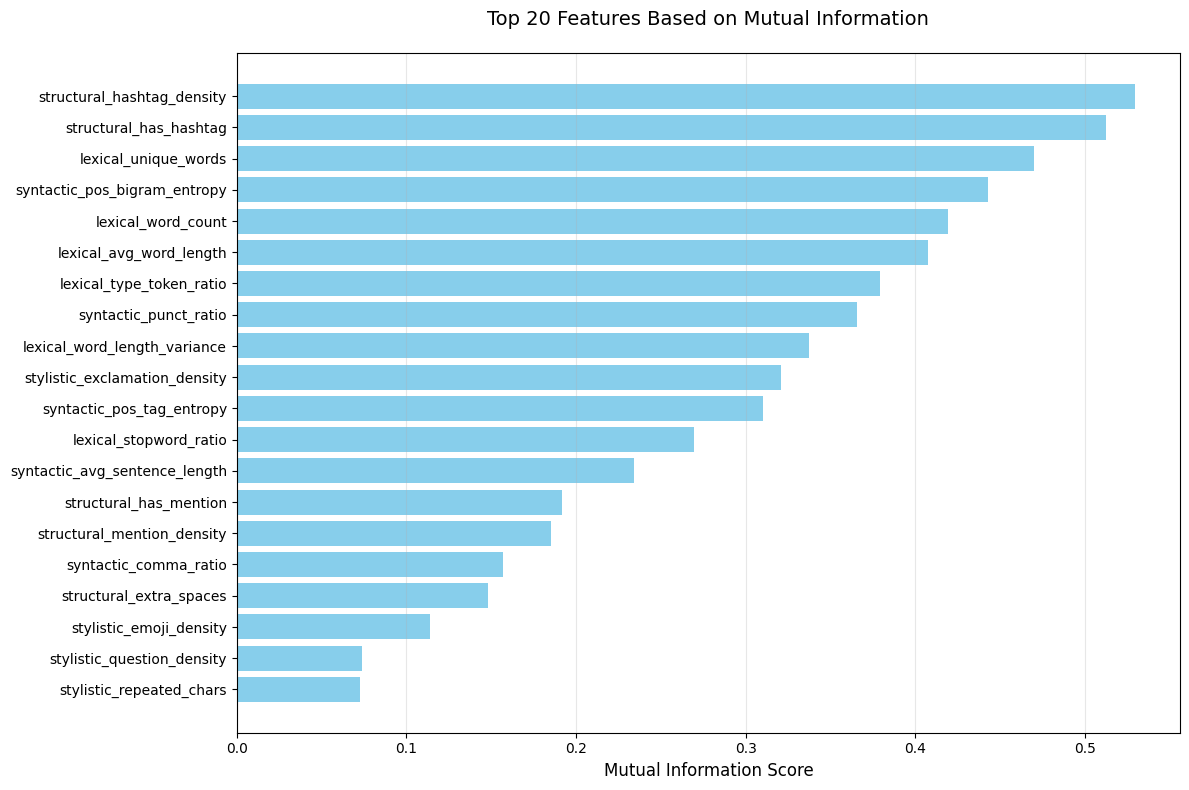

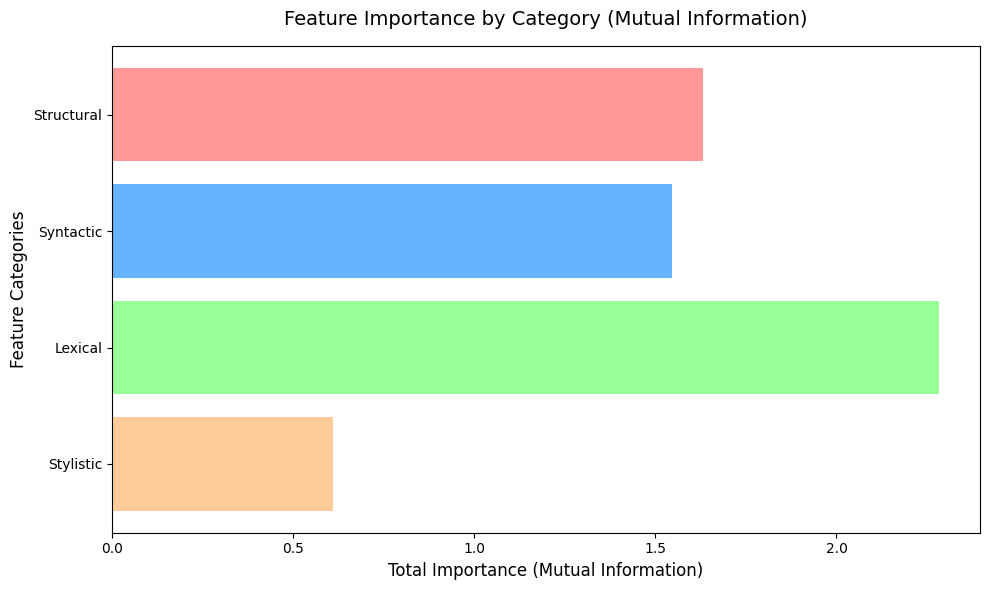

In [3]:
categories = {
    'Structural': ['structural'],
    'Syntactic': ['syntactic'],
    'Lexical': ['lexical'],
    'Stylistic': ['stylistic']
}
sml.plot_feature_20importance(top20_features)
sml.plot_feature_importance(top_features, top_n=20, categories=categories)

In [4]:
X = df[top20_features['feature'].tolist()]
y = df['origin'].astype(int)

In [17]:
#VERIFICAÇÃO DE OUTLIERS 
outliers = {}

for col in X.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    # Índices com outliers
    outlier_idx = df[(df[col] < lower) | (df[col] > upper)].index
    outliers[col] = len(outlier_idx)

# Mostrar número de outliers por coluna
outliers

{'structural_hashtag_density': 1226,
 'structural_has_hashtag': 0,
 'lexical_unique_words': 67,
 'syntactic_pos_bigram_entropy': 664,
 'lexical_word_count': 200,
 'lexical_avg_word_length': 573,
 'lexical_type_token_ratio': 342,
 'syntactic_punct_ratio': 467,
 'lexical_word_length_variance': 1175,
 'ai': 3416,
 'stylistic_exclamation_density': 1662,
 'syntactic_pos_tag_entropy': 1213,
 'lexical_stopword_ratio': 141,
 'syntactic_avg_sentence_length': 1945,
 'structural_has_mention': 0,
 'structural_mention_density': 1976,
 'syntactic_comma_ratio': 912,
 'structural_extra_spaces': 4910,
 'artificial': 1568,
 'intelligence': 1576}

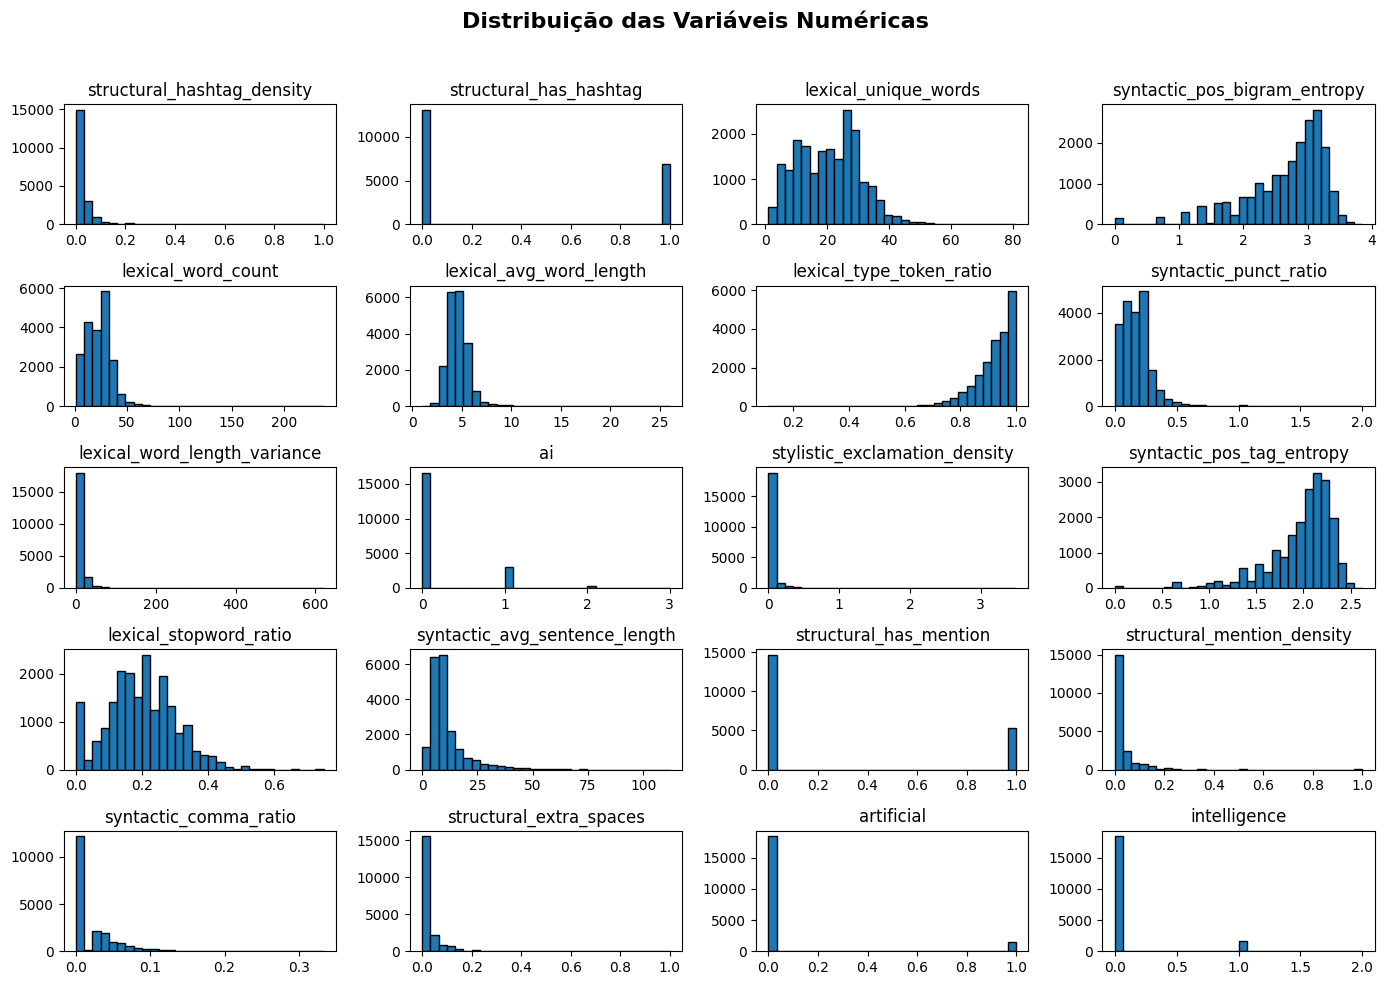

In [18]:
X.hist(figsize=(14,10), bins=30, edgecolor='black', grid=False)
plt.suptitle("Distribuição das Variáveis Numéricas", fontsize=16, fontweight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajusta o título
plt.show()


📊 RESULTADOS DA VALIDAÇÃO CRUZADA:
----------------------------------------
accuracy    : 0.9606 ± 0.0043
precision   : 0.9765 ± 0.0042
recall      : 0.9439 ± 0.0062
f1          : 0.9599 ± 0.0044
roc_auc     : 0.9878 ± 0.0018 (baseado em 5/5 folds válidos)

📈 MÉTRICAS NO CONJUNTO DE TESTE:
------------------------------
Accuracy : 0.9633
Precision: 0.9828
Recall   : 0.9430
F1-Score : 0.9625
ROC-AUC  : 0.9895


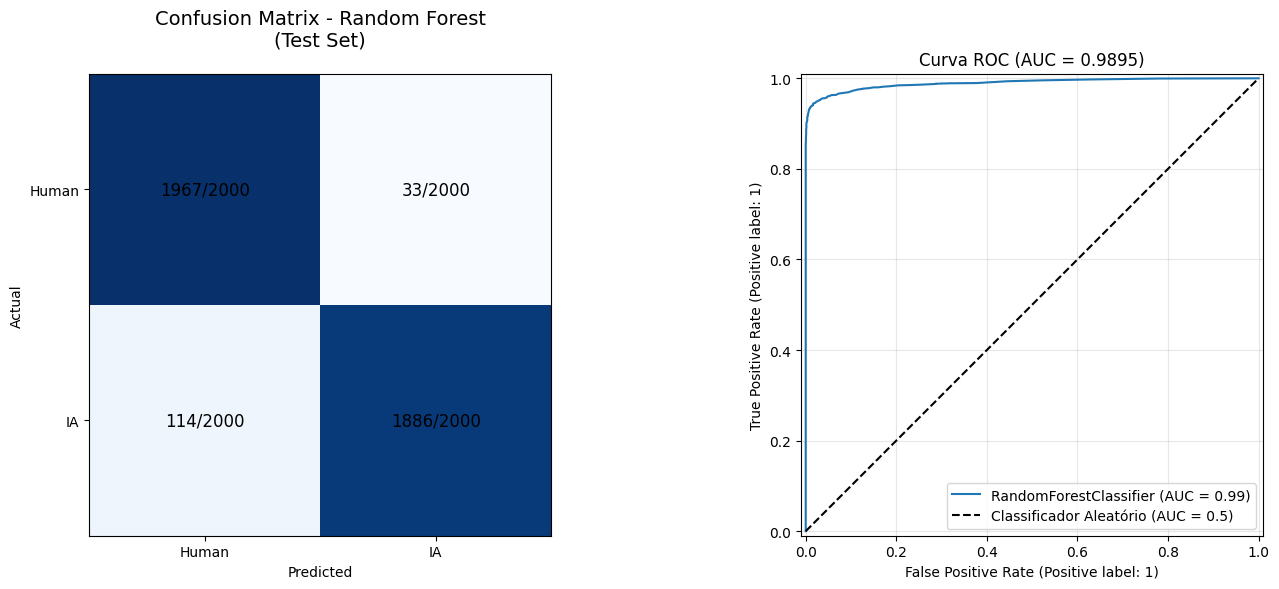

(RandomForestClassifier(n_jobs=-1, random_state=42),
 array([[1967,   33],
        [ 114, 1886]]),
 {'test_accuracy': array([0.95675, 0.95925, 0.95775, 0.96875, 0.9605 ]),
  'test_precision': array([0.97553358, 0.97175141, 0.97756912, 0.98399587, 0.97376543]),
  'test_recall': array([0.937 , 0.946 , 0.937 , 0.953 , 0.9465]),
  'test_f1': array([0.9558786 , 0.95870281, 0.95685474, 0.96824994, 0.95993915]),
  'test_roc_auc': array([0.98564012, 0.98704788, 0.98656763, 0.99072388, 0.98882625])})

In [5]:
sml.random_forest_pipeline(X, y)

🔍 Classificação Binária: Classes [0 1]
📊 Distribuição:
   Classe 0: 10000 amostras
   Classe 1: 10000 amostras
🔧 Pré-processamento:
   StandardScaler: 3 features
   MinMaxScaler: 13 features

📊 RESULTADOS DA VALIDAÇÃO CRUZADA (Logistic Regression):
------------------------------------------------------------
accuracy    : 0.9466 ± 0.0042
precision   : 0.9589 ± 0.0044
recall      : 0.9331 ± 0.0064
f1          : 0.9458 ± 0.0043
roc_auc     : 0.9805 ± 0.0026 (baseado em 5/5 folds válidos)

📈 MÉTRICAS NO CONJUNTO DE TESTE:
------------------------------
Accuracy : 0.9487
Precision: 0.9600
Recall   : 0.9365
F1-Score : 0.9481
ROC-AUC  : 0.9821


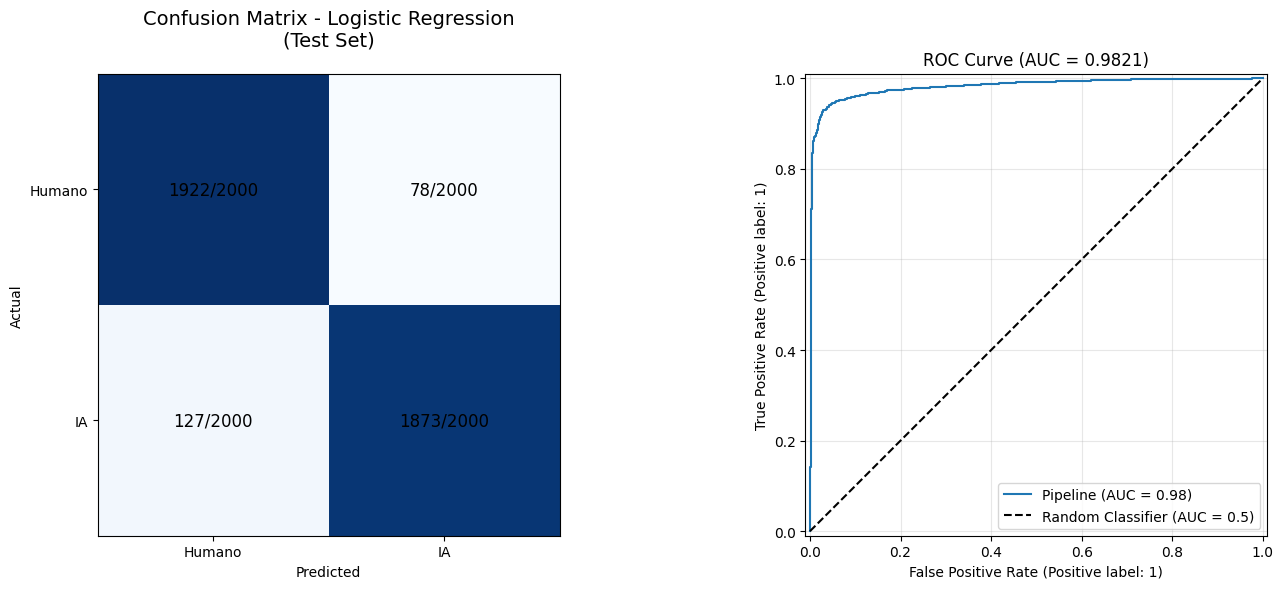


🎯 TOP 15 COEFICIENTES MAIS IMPORTANTES:
----------------------------------------
 1. syntactic_punct_ratio    : + 7.3922
 2. structural_extra_spaces  : - 6.5716
 3. stylistic_emoji_density  : + 5.2375
⚠️  Não foi possível extrair coeficientes: list index out of range


(Pipeline(steps=[('preprocessor',
                  ColumnTransformer(remainder='passthrough',
                                    transformers=[('standard', StandardScaler(),
                                                   ['lexical_word_count',
                                                    'lexical_avg_word_length',
                                                    'lexical_unique_words']),
                                                  ('minmax', MinMaxScaler(),
                                                   ['structural_hashtag_density',
                                                    'structural_extra_spaces',
                                                    'stylistic_exclamation_density',
                                                    'stylistic_emoji_density',
                                                    'stylistic_repeated_chars',
                                                    'syntactic_punct_ratio',
                                  

In [6]:
sml.logistic_regression_pipeline(X, y, test_size=0.2, random_state=42, cv=5, max_iter=1000)

🔍 Classes: [0 1]
📊 Distribuição: [10000 10000]
🔄 Executando validação cruzada...



📊 RESULTADOS DA VALIDAÇÃO CRUZADA (SVM):
------------------------------------------------------------
accuracy    : 0.9456 ± 0.0040
precision   : 0.9777 ± 0.0039
recall      : 0.9119 ± 0.0058
f1          : 0.9436 ± 0.0042
roc_auc     : 0.9808 ± 0.0023
🔧 Treinando modelo final...

📈 MÉTRICAS NO CONJUNTO DE TESTE:
------------------------------
Accuracy : 0.9530
Precision: 0.9646
Recall   : 0.9405
F1-Score : 0.9524
ROC-AUC  : 0.9841


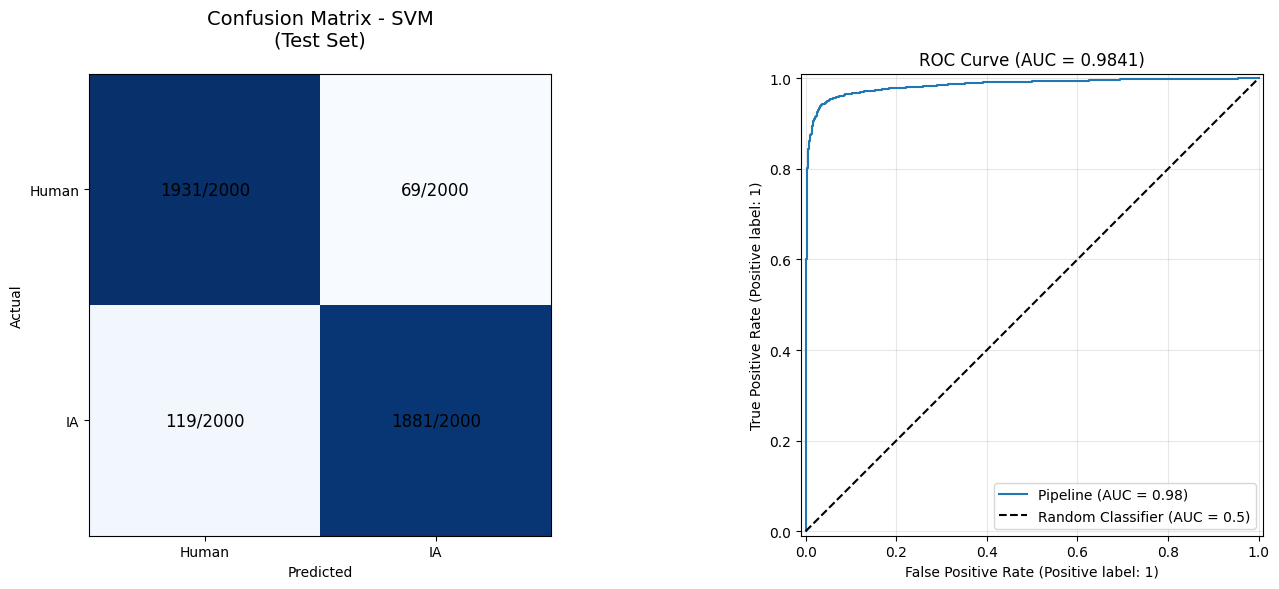

(Pipeline(steps=[('preprocessor',
                  ColumnTransformer(remainder='passthrough',
                                    transformers=[('scaler', StandardScaler(),
                                                   Index(['structural_hashtag_density', 'structural_has_hashtag',
        'lexical_unique_words', 'syntactic_pos_bigram_entropy',
        'lexical_word_count', 'lexical_avg_word_length',
        'lexical_type_token_ratio', 'syntactic_punct_ratio',
        'lexical_word_length_v...
        'syntactic_avg_sentence_length', 'structural_has_mention',
        'structural_mention_density', 'syntactic_comma_ratio',
        'structural_extra_spaces', 'stylistic_emoji_density',
        'stylistic_question_density', 'stylistic_repeated_chars'],
       dtype='object'))])),
                 ('classifier',
                  CalibratedClassifierCV(cv=3,
                                         estimator=SVC(class_weight='balanced',
                                                  

In [7]:
sml.svm_pipeline(X, y, test_size=0.2, random_state=42, cv=5, kernel="linear")

In [8]:
df = pd.read_csv("/home/tammy.kojima/Authorship-attribution/df_pronto/df_mistral_com_features2.csv")
feature_columns = [col for col in df.columns if col not in ['text', 'origin']]

📊 Calculando Mutual Information...
🔍 Removendo features redundantes...
   🗑️  Removendo 'ai' (coluna especificada)
   🗑️  Removendo 'intelligence' (coluna especificada)
   🗑️  Removendo 'artificial intelligence' (coluna especificada)
   🗑️  Removendo 'artificial' (coluna especificada)
   🗑️  Removendo 'education' (coluna especificada)
   🗑️  Removendo 'students' (coluna especificada)
   🔄 Removendo 'syntactic_pos_bigram_entropy' (correlacionada com 'lexical_unique_words': 0.891)
   🔄 Removendo 'lexical_word_count' (correlacionada com 'lexical_unique_words': 0.967)
   🔄 Removendo 'lexical_type_token_ratio' (correlacionada com 'ai_perplexity_score': 1.000)
   🔄 Removendo 'complexity_rare_words' (correlacionada com 'lexical_stopword_ratio': 0.836)
   🔄 Removendo 'the future' (correlacionada com 'future': 0.888)
   🔄 Removendo 'llm_structured_output' (correlacionada com 'chatgpt_structured_output': 1.000)
   🔄 Removendo 'mistral_structured_density' (correlacionada com 'chatgpt_structured_o

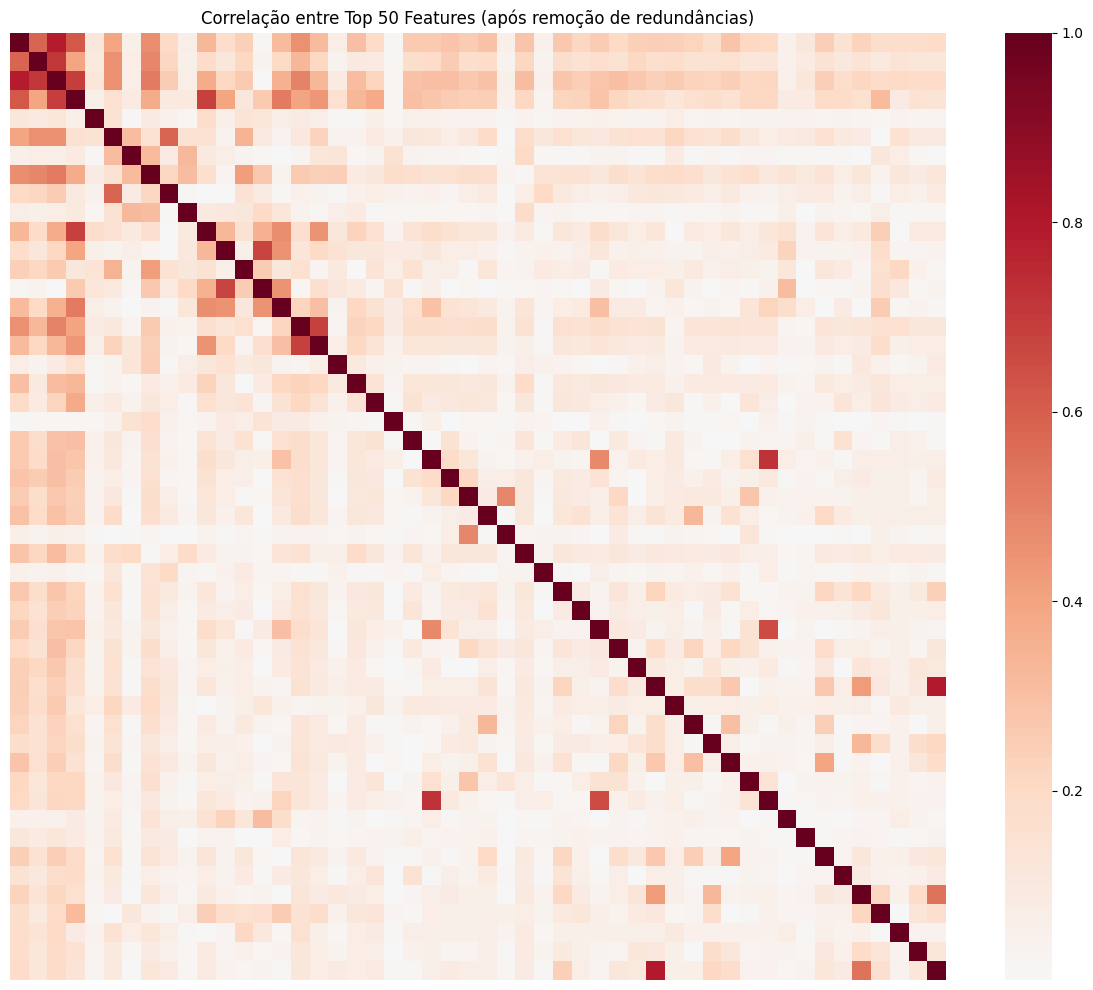

🎯 Selecionando melhor conjunto de features...


NameError: name 'results' is not defined

In [ ]:
# Exemplo de uso:
mi_df_final = sml.validate_feature_selection(
    df=df,
    feature_names=feature_columns,
    target='origin',
    top_n_range=range(10, 101, 10),  # Testa de 10 a 100 features em steps de 10
    cv_folds=5,
    correlation_threshold=0.8
)
mi_df_final
mi_df_final.to_csv("/home/tammy.kojima/Authorship-attribution/df_pronto/top_features_mistral2.csv", index=False)

In [9]:
top_features = pd.read_csv("/home/tammy.kojima/Authorship-attribution/df_pronto/top_features_mistral2.csv")
top20_features = top_features.head(20)

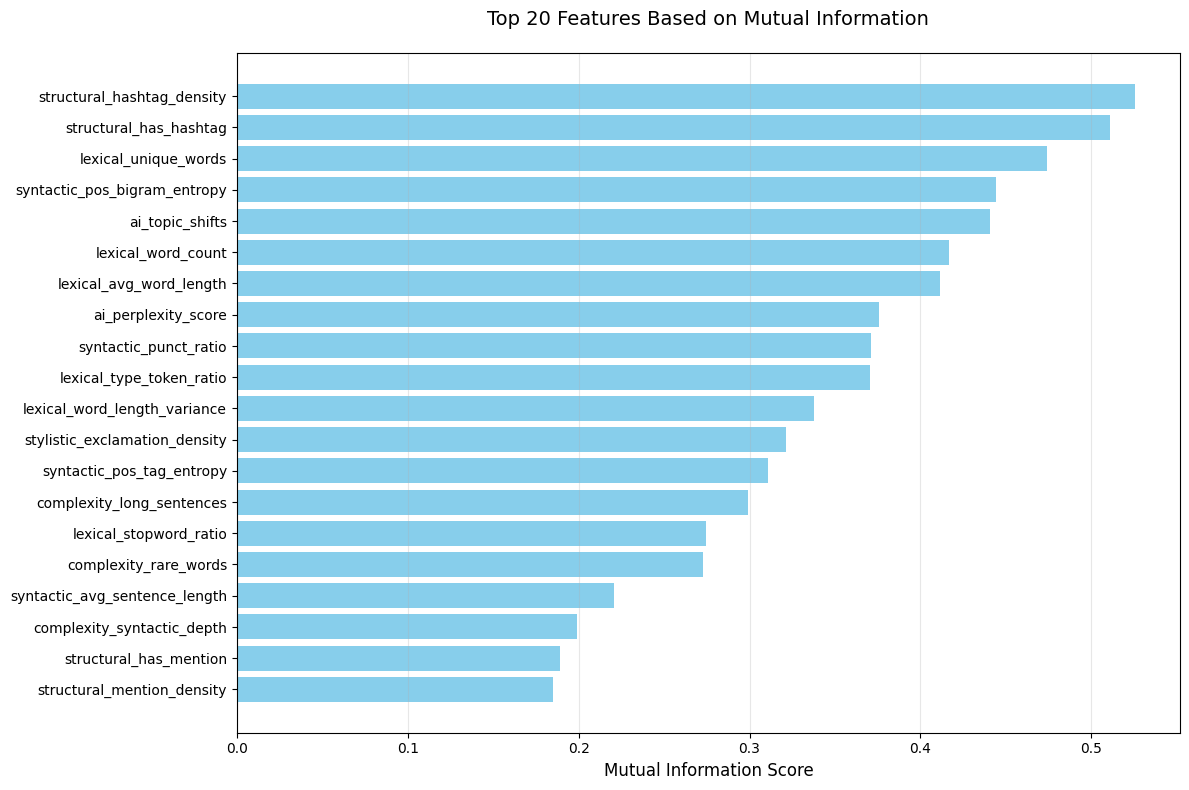

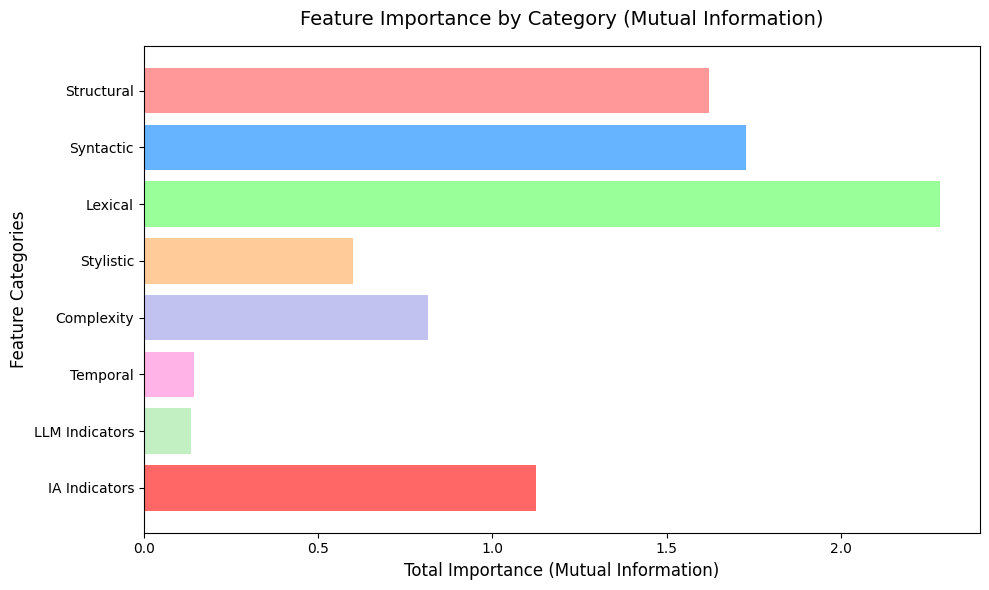

In [5]:
categories = {
    'Structural': ['structural'],
    'Syntactic': ['syntactic'],
    'Lexical': ['lexical'],
    'Stylistic': ['stylistic'],
    'Complexity': ['complexity'],
    'Temporal': ['temporal'],
    'LLM Indicators': ['llm', 'mistral'],
    'IA Indicators': ['ai']
}
sml.plot_feature_20importance(top20_features)
sml.plot_feature_importance(top_features, top_n=20, categories=categories)

In [10]:
X = df[top20_features['feature'].tolist()]
y = df['origin']


📊 RESULTADOS DA VALIDAÇÃO CRUZADA:
----------------------------------------
accuracy    : 0.9960 ± 0.0008
precision   : 0.9972 ± 0.0022
recall      : 0.9948 ± 0.0026
f1          : 0.9960 ± 0.0008
roc_auc     : 0.9998 ± 0.0002 (baseado em 5/5 folds válidos)

📈 MÉTRICAS NO CONJUNTO DE TESTE:
------------------------------
Accuracy : 0.9965
Precision: 0.9980
Recall   : 0.9950
F1-Score : 0.9965
ROC-AUC  : 0.9994


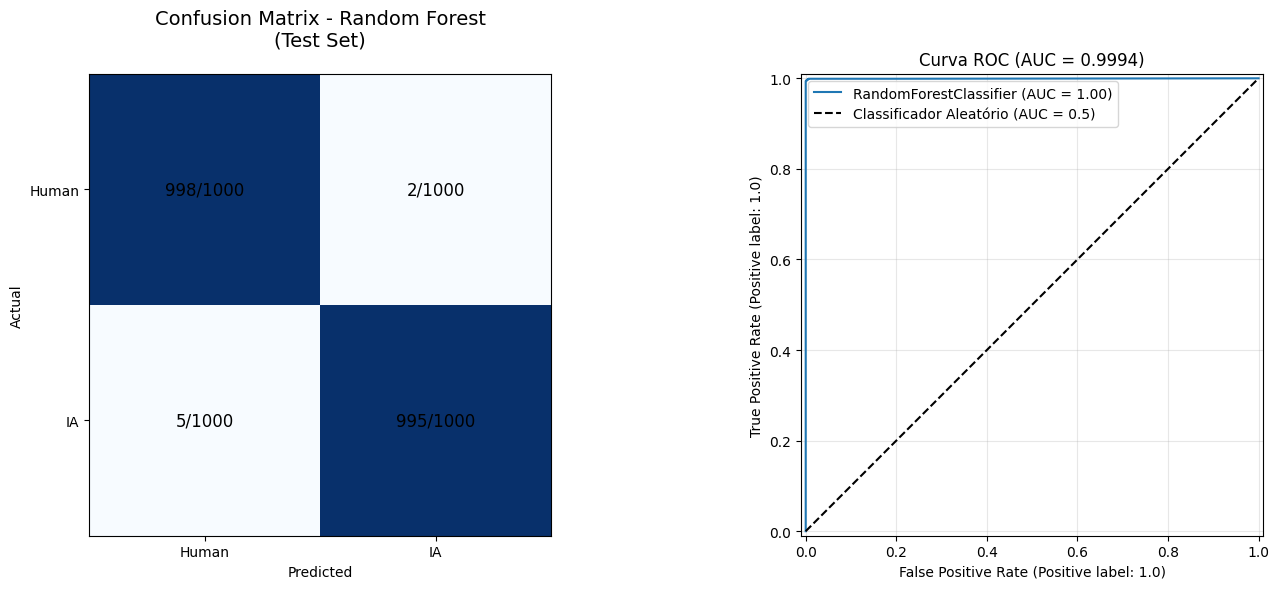

(RandomForestClassifier(n_jobs=-1, random_state=42),
 array([[998,   2],
        [  5, 995]]),
 {'test_accuracy': array([0.995 , 0.997 , 0.9955, 0.997 , 0.9955]),
  'test_precision': array([0.99899194, 0.997     , 0.99303483, 0.99899598, 0.99798995]),
  'test_recall': array([0.991, 0.997, 0.998, 0.995, 0.993]),
  'test_f1': array([0.99497992, 0.997     , 0.99551122, 0.99699399, 0.99548872]),
  'test_roc_auc': array([0.99937  , 0.9999425, 0.9999235, 0.9999575, 0.999906 ])})

In [11]:
sml.random_forest_pipeline(X, y, test_size=0.2, random_state=42, n_estimators=100)

🔍 Classificação Binária: Classes [0. 1.]
📊 Distribuição:
   Classe 0.0: 5000 amostras
   Classe 1.0: 5000 amostras
🔧 Pré-processamento:
   StandardScaler: 3 features
   MinMaxScaler: 9 features

📊 RESULTADOS DA VALIDAÇÃO CRUZADA (Logistic Regression):
------------------------------------------------------------
accuracy    : 0.9915 ± 0.0027
precision   : 0.9905 ± 0.0054
recall      : 0.9926 ± 0.0031
f1          : 0.9915 ± 0.0026
roc_auc     : 0.9988 ± 0.0014 (baseado em 5/5 folds válidos)

📈 MÉTRICAS NO CONJUNTO DE TESTE:
------------------------------
Accuracy : 0.9950
Precision: 0.9940
Recall   : 0.9960
F1-Score : 0.9950
ROC-AUC  : 0.9986


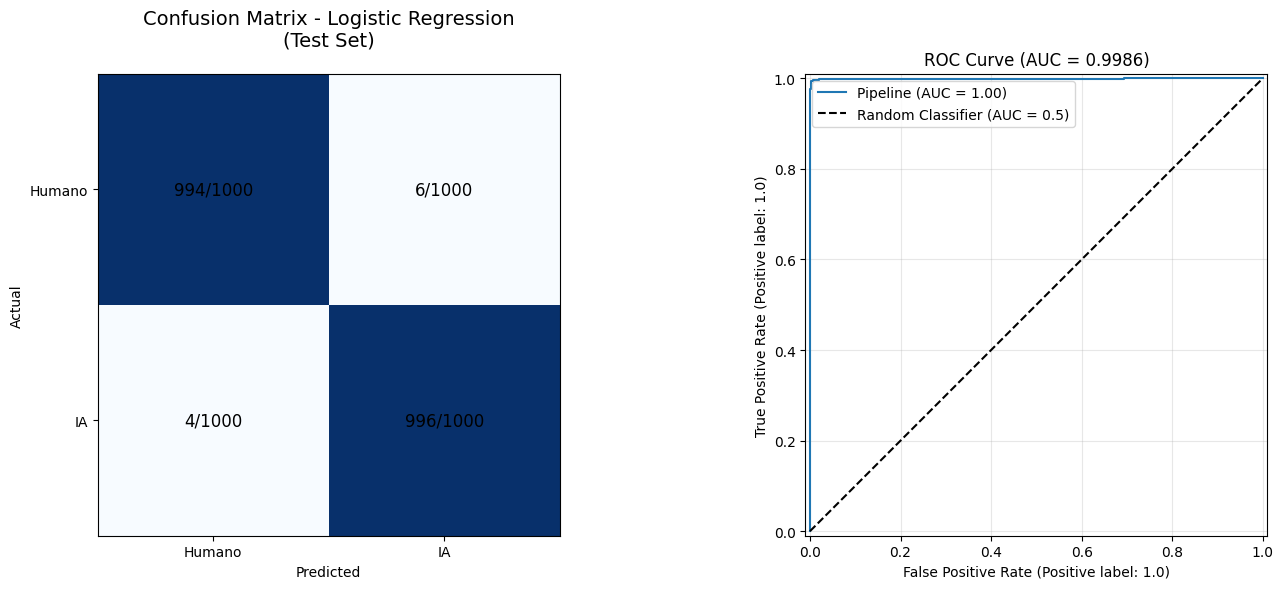


🎯 TOP 15 COEFICIENTES MAIS IMPORTANTES:
----------------------------------------
 1. lexical_unique_words     : + 5.6171
 2. structural_has_hashtag   : + 4.5271
 3. structural_has_mention   : - 4.1054
 4. syntactic_punct_ratio    : + 3.6824
 5. syntactic_pos_tag_entropy: - 2.5079
 6. lexical_stopword_ratio   : - 1.8710
 7. lexical_word_length_variance: - 1.4124
⚠️  Não foi possível extrair coeficientes: list index out of range


(Pipeline(steps=[('preprocessor',
                  ColumnTransformer(remainder='passthrough',
                                    transformers=[('standard', StandardScaler(),
                                                   ['lexical_word_count',
                                                    'lexical_avg_word_length',
                                                    'lexical_unique_words']),
                                                  ('minmax', MinMaxScaler(),
                                                   ['structural_hashtag_density',
                                                    'stylistic_exclamation_density',
                                                    'syntactic_punct_ratio',
                                                    'structural_has_hashtag',
                                                    'structural_has_mention',
                                                    'lexical_word_length_variance',
                                

In [12]:
sml.logistic_regression_pipeline(X, y, test_size=0.2, random_state=42, cv=5, max_iter=1000)

🔍 Classes: [0. 1.]
📊 Distribuição: [5000 5000]
🔄 Executando validação cruzada...

📊 RESULTADOS DA VALIDAÇÃO CRUZADA (SVM):
------------------------------------------------------------
accuracy    : 0.9951 ± 0.0018
precision   : 0.9946 ± 0.0039
recall      : 0.9956 ± 0.0023
f1          : 0.9951 ± 0.0018
roc_auc     : 0.9988 ± 0.0014
🔧 Treinando modelo final...

📈 MÉTRICAS NO CONJUNTO DE TESTE:
------------------------------
Accuracy : 0.9965
Precision: 0.9970
Recall   : 0.9960
F1-Score : 0.9965
ROC-AUC  : 0.9989


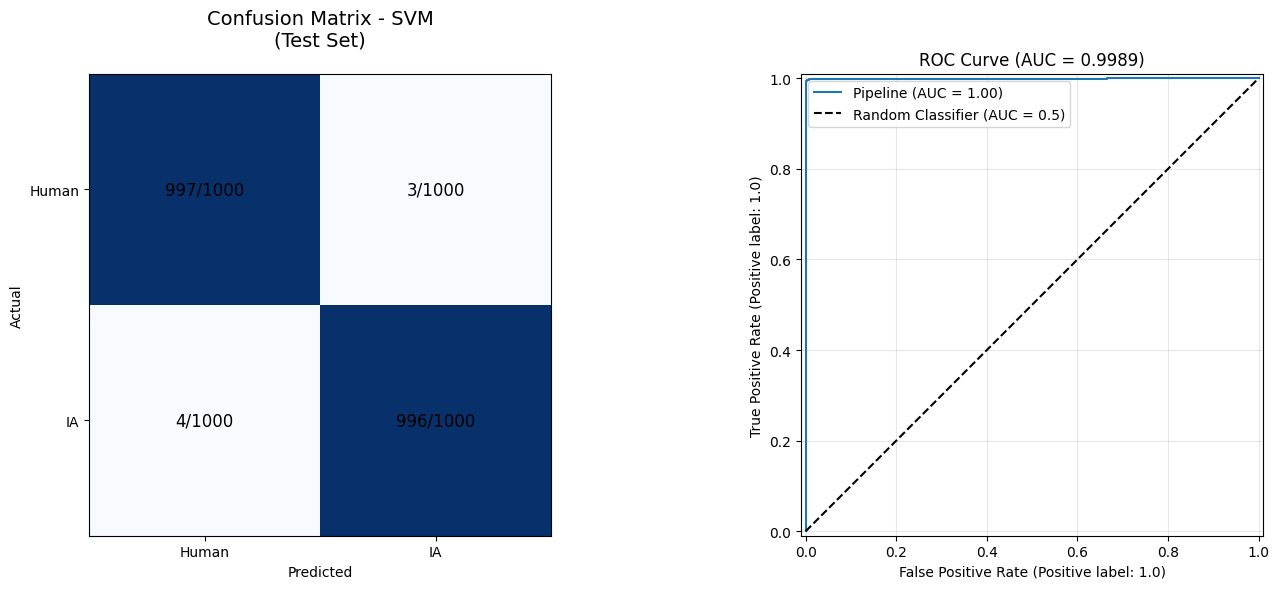

(Pipeline(steps=[('preprocessor',
                  ColumnTransformer(remainder='passthrough',
                                    transformers=[('scaler', StandardScaler(),
                                                   Index(['structural_hashtag_density', 'structural_has_hashtag',
        'lexical_unique_words', 'syntactic_pos_bigram_entropy',
        'ai_topic_shifts', 'lexical_word_count', 'lexical_avg_word_length',
        'ai_perplexity_score', 'syntactic_punct_ratio',
        'lexical_...
        'stylistic_exclamation_density', 'syntactic_pos_tag_entropy',
        'complexity_long_sentences', 'lexical_stopword_ratio',
        'complexity_rare_words', 'syntactic_avg_sentence_length',
        'complexity_syntactic_depth', 'structural_has_mention',
        'structural_mention_density'],
       dtype='object'))])),
                 ('classifier',
                  CalibratedClassifierCV(cv=3,
                                         estimator=SVC(class_weight='balanced',
      

In [13]:
sml.svm_pipeline(X, y, test_size=0.2, random_state=42, cv=5, kernel="linear")

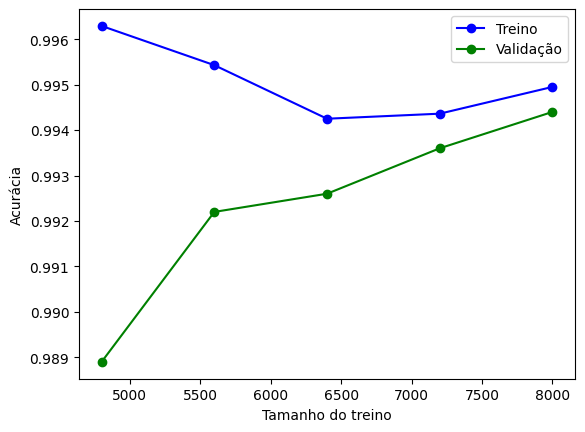

In [55]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

model = SVC(
    kernel="linear",   # kernel linear
    C=1.0,             # regularização
    probability=True,  # necessário se quiser calcular ROC-AUC
    random_state=42
)

train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Treino')
plt.plot(train_sizes, test_mean, 'o-', color='green', label='Validação')
plt.xlabel('Tamanho do treino')
plt.ylabel('Acurácia')
plt.legend()
plt.show()
